In [1]:
import numpy as np

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
test size 264
train size 2370
Contoh X_train = [[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]


(2370,)

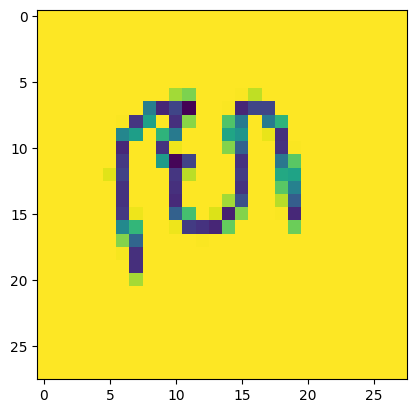

In [2]:
import load_gambar
train_images = load_gambar.X_data_train
print(train_images.shape)
train_label = np.array(load_gambar.Y_label)
train_label.shape

In [3]:
def outputShape(imgSize, kernelSize):
    numPixcel = 0
    for i in range(imgSize):
        added = i + kernelSize
        if added <= imgSize:
            numPixcel += 1
    return numPixcel
# outputShape(w, n)    

In [4]:
# Digunakan ketika ingin same padding 
# jadi misalnya menggunakan kernel 3 bisa di tambahin add_padng sebelum melakukan konv
def add_padding_with_kernel_size (kernel_size) :
    return kernel_size // 2

def add_image_with_padding (img, padding):
    img_with_padding = np.zeros(shape=(
        img.shape[0] + padding * 2,  # Multiply with two because we need padding on all sides
        img.shape[1] + padding * 2
    ))
    
    img_with_padding[padding:-padding, padding:-padding] = img
    
    return img_with_padding

In [5]:
def convolusi(img= np.array, kernel= int, padding= ""):
    filter = np.random.randn(kernel, kernel) / 9
    h, w = img.shape
    if padding == "Same" :
        add_padding_width = kernel//2
        img_with_padding = np.zeros(shape = (h + add_padding_width * 2, w + add_padding_width * 2))
        img_with_padding[add_padding_width:-add_padding_width, add_padding_width:-add_padding_width] = img
        img = img_with_padding
#         print(img)
    else :
        img = img
        
    target = outputShape(img.shape[0], kernel)
    output = np.zeros(shape=(target, target))
    for i in range(target):
        for j in range(target):
            mat = img[i:i+kernel, j:j+kernel]
            output[i,j] = np.sum(np.multiply(mat, filter))
#     print(output.shape)
    return output


In [6]:
def reLu(img):
    length_row, length_column = img.shape
    for row in range(length_row):
        for column in range(length_column):
            if img[row, column] < 0:
                img[row, column] = 0
#     print(img.shape)
    return img

In [7]:
def maxPooling(arr, stride=int, pool_size=int):
    arr = np.array(arr)
#     print(arr)
    w, h = arr.shape
    new_array = []
    output =[]
    for i in np.arange(w, step= stride):
        for j in np.arange(h, step = stride):
            mat = arr[i:i+pool_size, j:j+pool_size]
            if mat.shape == (pool_size, pool_size):
                new_array.append(mat)
    new_array = np.array(new_array)
#     print(new_array)
    output_pooling_shape = (int(np.sqrt(new_array.shape[0])), int(np.sqrt(new_array.shape[0])))
    for pool in new_array :
        output.append(np.max(pool))
#     print(np.array(output).reshape(output_pooling_shape).shape)
    return np.array(output).reshape(output_pooling_shape)


In [8]:
def flat(arr):
    array_flattern = arr.flatten()
#     print (array_flattern.shape)
    return np.array(array_flattern)

def hidden_layer(arr) :
    biases = 1
    output=[]
    arr = np.array(arr)
#     print(arr.shape)
    weights = np.random.randn(20, arr.shape[0]) - 0.5
    totals = weights.dot(arr) + 1
#     for i in range(weights.shape[0]) :
#         output.append(weights[i]*arr[i] )
#     totals = np.array(output).reshape(arr.shape)
#     print(totals)
    return totals

def softmax(totals):
    return np.exp(totals) / sum(np.exp(totals))
#     exp = np.exp(totals)
#     output = exp / np.sum(exp, axis=0)
#     return output



In [9]:
def feed_forward (image, label):
    conv1 = convolusi((image/ 255) - 0.5, 3, "no")
#     print("conv1 done")
    reLuu = reLu(conv1)
#     print("reluu done")
    maxPool = maxPooling(reLuu,2,2)
#     print("maxpoll done")
    flattening = flat(maxPool)
#     print("flatdone")
#     sofmax buat def baru dah
    fc1 = hidden_layer(flattening)
    out = softmax(fc1)
#     print("softmax done")
    prediction = np.argmax(out, 0)
    acc = np.sum(prediction == label) / label.size
    # Calculate cross-entropy loss and accuracy. np.log() is the natural log.
#     loss = -np.log(fc1[label])
#     acc = 1 if np.argmax(out) == label else 0
#     print(acc)
    return acc
    
    
    

In [11]:
def feed2 (image, label):
    conv1 = convolusi((image/ 255) - 0.5, 3, "no")
#     print("conv1 done")
    reLuu = reLu(conv1)
#     print("reluu done")
    maxPool = maxPooling(reLuu,2,2)
#     print("maxpoll done")
    conv2 = convolusi(maxPool, 3, "Same")
#     print("conv2 done")
    reLuu2 = reLu(conv2)
#     print("reluu2 done")
    maxPool2 = maxPooling(reLuu2,2,2)
#     print("maxpoll2 done")
    flattening = flat(maxPool2)
#     print("flatdone")
#     sofmax buat def baru dah
    fc1 = hidden_layer(flattening)
    out = softmax(fc1)
    loss = -np.log(out[label])


#     print("softmax done")
    prediction = np.argmax(out, 0)
    acc = np.sum(prediction == label) / label.size
#     Calculate cross-entropy loss and accuracy. np.log() is the natural log.
    acc = 1 if np.argmax(out) == label else 0
#     print(acc)
    return acc, loss

In [ ]:
loss = 0
num_correct = 0
for i, (im, label) in enumerate(zip(train_images, train_label)):
  # Do a forward pass.
  acc, l = feed2(im, label)
  loss += l
  num_correct += acc

  # Print stats every 100 steps.
  if i % 100 == 99:
    print(
      '[Step %d] Past 100 steps: Average Loss %.3f | Accuracy: %d%%' %
      (i + 1, num_correct)
    )
    loss = 0
    num_correct = 0

In [13]:
loss = 0
num_correct = 0
prediksi_train = []
for im, label in zip(train_images, train_label):
  acc, l = feed2(im, label)
  loss += l
  num_correct += acc
num_tests = len(train_images)
print('Train Loss:', loss / num_tests)
print('Train Accuracy:', num_correct / num_tests)
print("prediksi train: ", prediksi_train)



Train Loss: 3.016070920082713
Train Accuracy: 0.05822784810126582
prediksi train:  []
